In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
#reading csv file using pandas
df=pd.read_csv('./contact_detection_train.csv')
data=df.copy()

In [6]:
data.sample(10)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var776,Var777,Var778,Var779,Var780,Var781,Var782,Var783,Var784,Var785
1058,Noncontact,-0.193669,-11.1691,0.111912,21.3641,0.305874,2.29375,0.031236,-0.139398,0.182022,...,-0.000254,-8.344650e-06,5.066390e-06,0.000534,0.001099,-0.000195,-0.000355,0.000101,-0.000132,0.005909
1542,Noncontact,-0.193669,-11.1294,0.111912,21.4038,0.295803,2.31480,0.011095,-0.152465,0.230862,...,-0.000249,4.768370e-07,-9.655950e-06,0.000398,-0.000421,-0.000121,0.000028,-0.000277,0.000914,-0.000268
875,Noncontact,0.449031,-13.0813,0.417393,18.9639,0.429470,2.24156,0.214342,-0.019223,-0.262248,...,-0.000104,-4.215240e-04,8.329150e-04,0.006711,-0.001049,0.000818,-0.000837,-0.000155,0.003710,-0.004566
1116,Noncontact,0.147518,-13.9065,0.226963,18.9282,0.514614,2.28276,0.132860,0.024822,-0.200503,...,-0.000099,-5.419250e-04,7.537600e-04,0.003807,0.002585,-0.001644,-0.001221,0.010880,0.004541,0.006479
685,Intentional_Link6,-0.495183,-14.0930,-0.653774,17.0874,0.572292,2.17839,-0.172011,-0.091229,-0.903944,...,0.000232,5.285740e-04,3.666160e-03,-0.046319,-0.020786,0.005583,-0.075433,0.004156,-0.006961,0.004643
373,Intentional_Link6,-2.387580,-13.1567,-2.189110,18.2894,0.639126,2.38805,-0.019118,-1.894550,0.889794,...,0.000039,-3.646850e-03,-9.495020e-05,-0.018996,-0.456944,-0.010083,-0.053551,0.004926,-0.370373,-0.002935
1072,Noncontact,-0.153996,-23.8089,0.072239,12.7352,0.115444,2.32487,-0.009047,-0.038308,-0.190546,...,0.000023,-5.545620e-04,-9.799000e-05,0.000202,-0.006952,-0.001572,0.003165,-0.000570,0.002057,0.001905
633,Collision_Link6,-0.876042,-26.4709,-0.768826,16.9763,0.353481,3.12962,0.184130,-0.824660,-3.879030,...,0.000007,3.234860e-03,3.576280e-07,0.008831,0.379918,0.002915,-0.000821,-0.000404,0.341014,0.000369
281,Collision_Link5,-4.732240,-18.5562,-5.600980,27.0690,2.342920,2.17839,0.092577,-4.082440,-2.781560,...,0.000027,1.748800e-03,4.429820e-04,0.050108,0.230181,0.002792,0.005184,0.001579,0.199316,0.038065
252,Intentional_Link5,-7.342720,-18.4451,-7.866300,16.2265,0.200588,2.12620,0.184130,-6.983720,-0.185141,...,0.000012,3.769640e-03,-2.622600e-05,-0.007446,0.425755,-0.008826,-0.043932,-0.005233,0.444054,-0.000835


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Columns: 785 entries, Var1 to Var785
dtypes: float64(784), object(1)
memory usage: 9.2+ MB


In [8]:
data['Var1'].value_counts()/len(data)

Noncontact           0.543746
Intentional_Link5    0.145820
Intentional_Link6    0.141283
Collision_Link6      0.085548
Collision_Link5      0.083603
Name: Var1, dtype: float64

<Axes: title={'center': 'Distribution of classes'}, ylabel='Var1'>

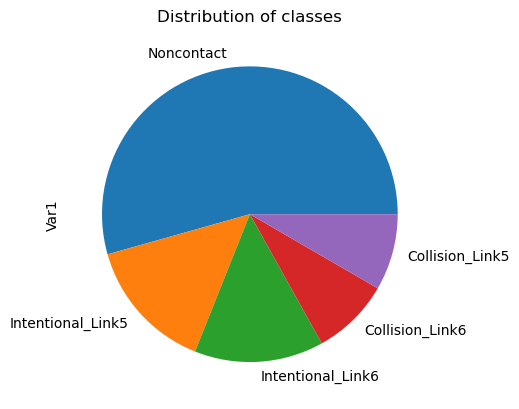

In [9]:
plt.figure(1)
plt.title('Distribution of classes')
data['Var1'].value_counts().plot.pie()

In [10]:
length=len(data.axes[1])

In [41]:
count=0
for i in range(length):
    s=data.isnull().sum().get(i)
    if(s!=0):
        print(i)
        count=count+1
if(count==0):
    print("Null values are not present in the dataset")
else:
    print(f"{count} null values are present in the dataset")

Null values are not present in the dataset


In [12]:
data.describe()

,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,...,Var776,Var777,Var778,Var779,Var780,Var781,Var782,Var783,Var784,Var785
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,...,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,-0.588014,-14.559518,-0.702089,18.100982,0.406691,2.374222,0.070890,-0.531252,-0.064745,-0.504229,...,-0.000067,0.000116,0.000356,0.026101,0.006104,0.002085,-0.000712,0.000726,0.005630,0.023975
std,1.473687,5.720703,1.658356,3.484278,0.496687,0.349668,0.337685,1.317212,1.494911,1.458791,...,0.000234,0.001793,0.001478,0.119024,0.188105,0.010797,0.029532,0.006582,0.173662,0.110203
min,-8.933600,-28.462500,-8.977140,7.593640,-2.568880,0.108383,-0.557448,-8.486490,-7.759960,-8.429440,...,-0.001671,-0.008088,-0.006182,-0.511981,-0.614235,-0.094425,-0.182505,-0.030147,-0.621818,-0.482474
25%,-0.459477,-19.682900,-0.618069,15.512300,0.210659,2.220500,-0.182081,-0.332871,-0.302403,-0.251405,...,-0.000254,-0.000534,-0.000102,-0.002933,-0.004555,-0.001481,-0.004501,-0.002410,-0.004352,-0.003428
50%,-0.153996,-13.716100,-0.193569,19.078900,0.305874,2.314800,0.112718,-0.146199,0.105308,-0.115030,...,-0.000027,-0.000007,0.000019,0.000295,0.000580,0.000475,-0.000093,-0.000082,0.000316,-0.000275
75%,0.032466,-10.210950,0.072239,20.538900,0.619900,2.523540,0.391954,-0.014101,0.319299,0.071525,...,0.000091,0.000808,0.000773,0.003870,0.006671,0.003241,0.003506,0.002346,0.006233,0.003667
max,1.206780,-0.362209,1.682960,31.385500,3.608180,5.043080,0.661119,0.955550,6.755930,1.526180,...,0.000696,0.008696,0.007742,0.529089,0.596661,0.102435,0.146417,0.045398,0.564136,0.526618


In [13]:
data_=data.drop('Var1',axis=1)
data_.sample(5)

,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,...,Var776,Var777,Var778,Var779,Var780,Var781,Var782,Var783,Var784,Var785
469,0.147518,-20.7699,0.302341,16.2265,0.248196,2.64897,-0.019118,0.024718,-0.857463,0.144216,...,-0.000105,-0.000442,-0.000320,0.004236,-0.008826,0.005599,0.013394,0.003117,0.012210,0.006362
1215,-0.042912,-20.3216,-0.042812,15.0601,0.001003,2.69109,0.173143,-0.002786,0.165982,0.035748,...,-0.000291,0.001098,0.000363,0.002424,-0.013876,0.001220,-0.000971,0.003448,-0.006249,-0.001679
78,-0.233342,-25.5703,-0.042812,13.6001,-0.275486,2.40819,0.082506,-0.101467,-2.822050,0.000726,...,-0.000034,0.003041,0.000055,0.002161,0.561667,0.000368,0.047910,-0.009733,0.503292,0.010216
908,-0.419804,-17.5445,-0.387966,16.7898,0.305874,2.10515,-0.070387,-0.380820,-0.207879,-0.240231,...,-0.000029,-0.000671,-0.000100,-0.000952,0.001436,0.002298,-0.002807,0.000644,0.001416,0.006308
1259,-0.269047,-21.5594,-0.308620,15.4727,0.134670,2.24156,0.274767,-0.387304,-0.216233,-0.269712,...,-0.000139,-0.001134,0.000136,-0.002903,0.007985,-0.001073,-0.002169,-0.001984,0.005913,-0.002469


In [14]:
labels=data['Var1'].copy()
labels.sample(5)

1091           Noncontact
1225           Noncontact
793            Noncontact
622     Intentional_Link6
104     Intentional_Link5
Name: Var1, dtype: object

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data_ ,labels ,test_size=.35 ,random_state=101)
y_train.value_counts()/len(y_train)

Noncontact           0.547904
Intentional_Link6    0.146707
Intentional_Link5    0.137725
Collision_Link6      0.084830
Collision_Link5      0.082834
Name: Var1, dtype: float64

<Axes: ylabel='Var1'>

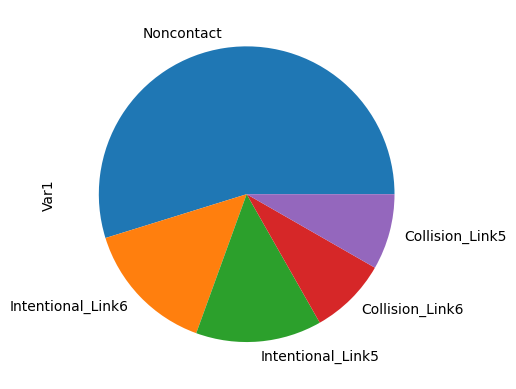

In [16]:
y_train.value_counts().plot.pie()

In [17]:
y_test.value_counts()/len(y_test)

Noncontact           0.536044
Intentional_Link5    0.160813
Intentional_Link6    0.131238
Collision_Link6      0.086876
Collision_Link5      0.085028
Name: Var1, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(max_depth=2, random_state=0)
model_RF.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [20]:
pred_RF_train=model_RF.predict(X_train)
pred_RF_test=model_RF.predict(X_test)
train_score=model_RF.score(X_train,y_train)
test_score=model_RF.score(X_test,y_test)
print("Accuracy of training dataset is "+str(train_score))
print("Accuracy of the random forest model on test dataset is "+str(round(test_score*100,2))+"%")

Accuracy of training dataset is 0.7275449101796407
Accuracy of the random forest model on test dataset is 69.87%


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_RF_train))

                   precision    recall  f1-score   support

  Collision_Link5       0.00      0.00      0.00        83
  Collision_Link6       0.00      0.00      0.00        85
Intentional_Link5       0.52      0.60      0.56       138
Intentional_Link6       0.49      0.66      0.56       147
       Noncontact       0.85      1.00      0.92       549

         accuracy                           0.73      1002
        macro avg       0.37      0.45      0.41      1002
     weighted avg       0.61      0.73      0.66      1002



C:\Users\91859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(classification_report(y_test,pred_RF_test))

                   precision    recall  f1-score   support

  Collision_Link5       0.00      0.00      0.00        46
  Collision_Link6       0.00      0.00      0.00        47
Intentional_Link5       0.48      0.52      0.50        87
Intentional_Link6       0.43      0.61      0.50        71
       Noncontact       0.84      1.00      0.91       290

         accuracy                           0.70       541
        macro avg       0.35      0.42      0.38       541
     weighted avg       0.58      0.70      0.63       541



C:\Users\91859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
param_grid_rf = { 
    'n_estimators': [25, 50, 100, 150],  
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
grid_search_rf= GridSearchCV(RandomForestClassifier(), param_grid_rf,verbose = 1, cv=5, n_jobs = -1) 

In [24]:
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [162]:
grid_search_rf.best_score_

0.8533134328358208

In [182]:
print("Optimum parameters for random forest model using gridSearchCV is")
grid_search_rf.best_params_

Optimum parameters for random forest model using gridSearchCV is


{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 50}

In [25]:
model_RF2 = RandomForestClassifier(max_depth=9,max_features='sqrt',max_leaf_nodes=9, n_estimators= 50 ,random_state=0)
model_RF2.fit(X_train, y_train)
pred_RF_train2=model_RF2.predict(X_train)
pred_RF_test2=model_RF2.predict(X_test)
train_score2=model_RF2.score(X_train,y_train)
test_score2=model_RF2.score(X_test,y_test)
print("Accuracy of the random forest model on test dataset after hyperparameter tuning is "+str(round(test_score2*100,2))+"%")

Accuracy of the random forest model on test dataset after hyperparameter tuning is 83.55%


In [42]:
print(classification_report(y_test,pred_RF_test2))

                   precision    recall  f1-score   support

  Collision_Link5       0.92      0.24      0.38        46
  Collision_Link6       0.86      0.53      0.66        47
Intentional_Link5       0.64      0.77      0.70        87
Intentional_Link6       0.57      0.83      0.68        71
       Noncontact       0.99      1.00      0.99       290

         accuracy                           0.84       541
        macro avg       0.80      0.67      0.68       541
     weighted avg       0.86      0.84      0.82       541



In [26]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=20, random_state=0)

In [27]:
bag_tree.fit(X_train,y_train)
pred_bag_tree_train=bag_tree.predict(X_train)
pred_bag_tree_test=bag_tree.predict(X_test)
print(classification_report(y_test,pred_bag_tree_test))

NameError: name 'bag_tree' is not defined

In [114]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=20, random_state=0)

In [115]:
pred_bag_train=bag.predict(X_train)
pred_bag_test=bag.predict(X_test)

In [196]:
acc_bg=accuracy_score(y_test,pred_bag_test)
print("Accuracy of ensemble bagging tree model in test dataset is " +str(round(acc_bg*100,2))+"%")

Accuracy of ensemble bagging tree model in test dataset is 89.65%


In [116]:
print(classification_report(y_train,pred_bag_train))

                   precision    recall  f1-score   support

  Collision_Link5       0.89      0.99      0.94        83
  Collision_Link6       0.96      0.96      0.96        85
Intentional_Link5       0.97      0.85      0.91       138
Intentional_Link6       0.90      0.93      0.91       147
       Noncontact       0.99      1.00      1.00       549

         accuracy                           0.96      1002
        macro avg       0.94      0.95      0.94      1002
     weighted avg       0.97      0.96      0.96      1002



In [117]:
print(classification_report(y_test,pred_bag_test))

                   precision    recall  f1-score   support

  Collision_Link5       0.66      0.85      0.74        46
  Collision_Link6       0.95      0.85      0.90        47
Intentional_Link5       0.86      0.69      0.76        87
Intentional_Link6       0.73      0.79      0.76        71
       Noncontact       0.99      1.00      0.99       290

         accuracy                           0.90       541
        macro avg       0.84      0.84      0.83       541
     weighted avg       0.90      0.90      0.90       541



In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
pred_knn_train=neigh.predict(X_train)
pred_knn_test=neigh.predict(X_test)

In [30]:
print(classification_report(y_train,pred_knn_train))

                   precision    recall  f1-score   support

  Collision_Link5       0.82      0.96      0.88        83
  Collision_Link6       0.93      0.93      0.93        85
Intentional_Link5       0.92      0.85      0.88       138
Intentional_Link6       0.95      0.78      0.86       147
       Noncontact       0.96      1.00      0.98       549

         accuracy                           0.94      1002
        macro avg       0.92      0.90      0.91      1002
     weighted avg       0.94      0.94      0.94      1002



In [31]:
print(classification_report(y_test,pred_knn_test))

                   precision    recall  f1-score   support

  Collision_Link5       0.65      0.87      0.74        46
  Collision_Link6       0.91      0.85      0.88        47
Intentional_Link5       0.87      0.67      0.75        87
Intentional_Link6       0.88      0.62      0.73        71
       Noncontact       0.91      1.00      0.95       290

         accuracy                           0.87       541
        macro avg       0.84      0.80      0.81       541
     weighted avg       0.88      0.87      0.87       541



In [32]:
acc_knn=accuracy_score(y_test,pred_knn_test)

In [33]:
print("Accuracy of the KNN model on test dataset is "+str(round(acc_knn*100,2))+"%")

Accuracy of the KNN model on test dataset is 87.25%


In [34]:
from sklearn.model_selection import GridSearchCV
list_=np.arange(1,25,1)
grid_params_knn = { 'n_neighbors' : list_ ,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params_knn, verbose = 1, cv=5, n_jobs = -1)

In [128]:
gs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [129]:
gs_knn.best_score_

0.9161542288557214

In [180]:
print("Optimum hyperparameters found using grid search are\n")
gs_knn.best_params_

Optimum hyperparameters found using grid search are



{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [168]:
neigh2 = KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance')
neigh2.fit(X_train,y_train)
print("Accuracy of the model after hyperparameter tuning is "+str(round(gs_knn.best_score_*100,2))+"%")

Accuracy of the model after hyperparameter tuning is 91.62%


In [177]:
pred_RF_train=gs_knn.predict(X_train)
pred_knn_test_=gs_knn.predict(X_test)
acc_knn_=accuracy_score(y_test, pred_knn_test_)

In [179]:
print("Accuracy of the model after hyperparameter tuning is "+str(round(acc_knn_*100,2))+"%")

Accuracy of the model after hyperparameter tuning is 91.5%


In [176]:
print(classification_report(y_test,pred_knn_test_))

                   precision    recall  f1-score   support

  Collision_Link5       0.72      0.93      0.81        46
  Collision_Link6       0.95      0.89      0.92        47
Intentional_Link5       0.89      0.76      0.82        87
Intentional_Link6       0.92      0.76      0.83        71
       Noncontact       0.95      1.00      0.98       290

         accuracy                           0.91       541
        macro avg       0.89      0.87      0.87       541
     weighted avg       0.92      0.91      0.91       541



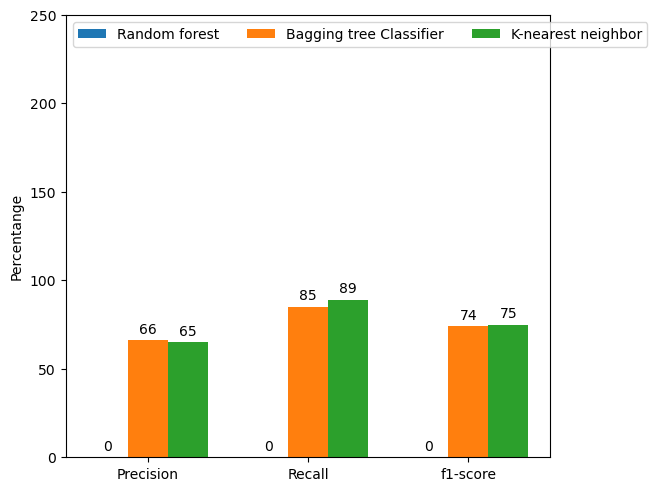

In [209]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Precision", "Recall","f1-score")
penguin_means = {
    'Random forest': (0,0,0),
    'Bagging tree Classifier': (66,85,74),
    'K-nearest neighbor': (65,89,75)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentange')

ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

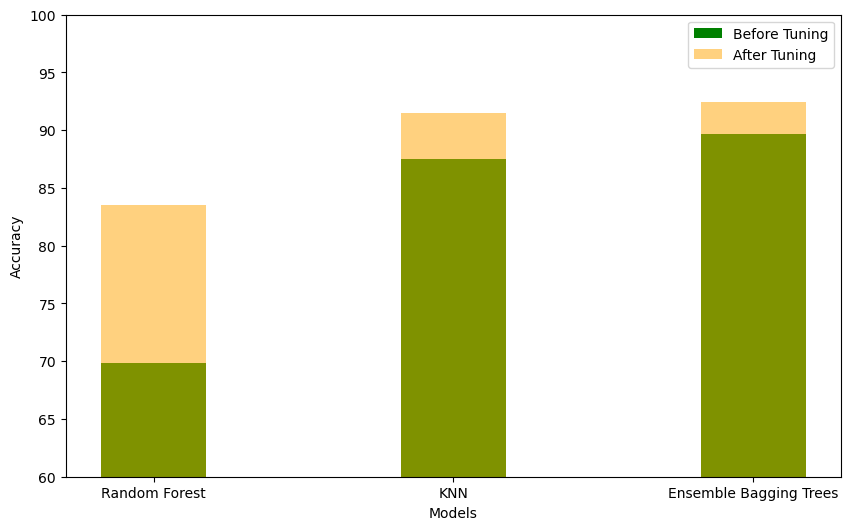

In [67]:
import matplotlib.pyplot as plt

# Accuracy scores before hyperparameter tuning
accuracies_before_tuning = [69.87, 87.5, 89.65]  # Accuracy scores for Random Forest, KNN, Ensemble Bagging Trees

# Accuracy scores after hyperparameter tuning
accuracies_after_tuning = [83.55, 91.5, 92.42]  # Accuracy scores for Random Forest, KNN, Ensemble Bagging Trees

models = ['Random Forest', 'KNN', 'Ensemble Bagging Trees']

plt.figure(figsize=(10, 6))

bar_width = 0.35  # Reducing the width of bars

# Adjusting colors for before and after tuning bars
plt.bar(models, accuracies_before_tuning, color='green', alpha=1, width=bar_width, label='Before Tuning')
plt.bar(models, accuracies_after_tuning, color='orange', alpha=0.5, width=bar_width, label='After Tuning')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(60, 100)

plt.show()


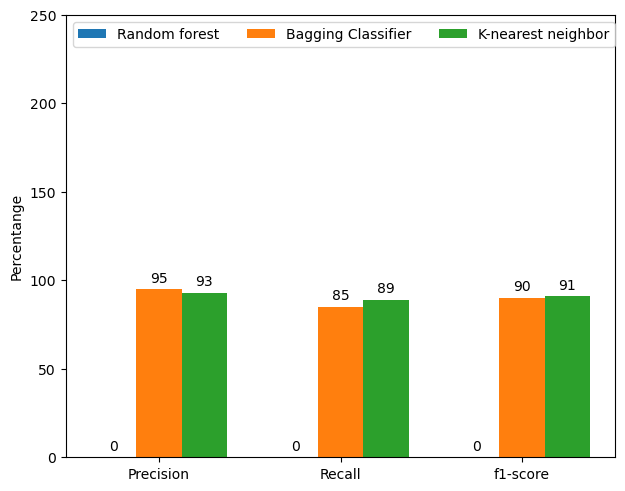

In [210]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Precision", "Recall","f1-score")
penguin_means = {
    'Random forest': (0,0,0),
    'Bagging Classifier': (95,85,90),
    'K-nearest neighbor': (93,89,91)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentange')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

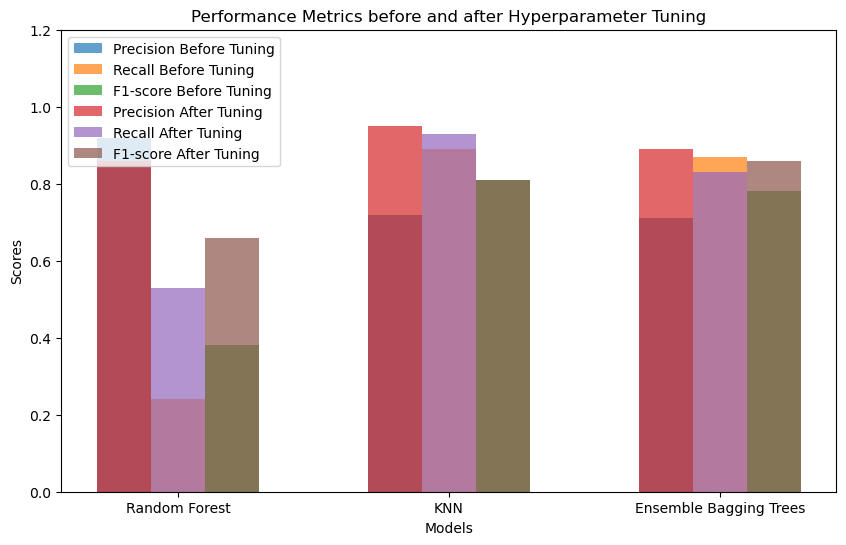

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Precision, recall, and F1-scores before hyperparameter tuning
precision_before = [0.92, 0.72, 0.71]  # Precision scores for Random Forest, KNN, Ensemble Bagging Trees
recall_before = [0.24, 0.89, 0.87]  # Recall scores for Random Forest, KNN, Ensemble Bagging Trees
f1_before = [0.38, 0.81, 0.78]  # F1-scores for Random Forest, KNN, Ensemble Bagging Trees

# Precision, recall, and F1-scores after hyperparameter tuning
precision_after = [0.86, 0.95, 0.89]  # Precision scores for Random Forest, KNN, Ensemble Bagging Trees
recall_after = [0.53, 0.93, 0.83]  # Recall scores for Random Forest, KNN, Ensemble Bagging Trees
f1_after = [0.66, 0.81, 0.86]  # F1-scores for Random Forest, KNN, Ensemble Bagging Trees

models = ['Random Forest', 'KNN', 'Ensemble Bagging Trees']
labels = ['Precision', 'Recall', 'F1-score']
bar_width = 0.2
x = np.arange(len(models))

plt.figure(figsize=(10, 6))

for i, metric in enumerate([precision_before, recall_before, f1_before]):
    plt.bar(x + i * bar_width, metric, width=bar_width, label=labels[i] + ' Before Tuning', alpha=0.7)

for i, metric in enumerate([precision_after, recall_after, f1_after]):
    plt.bar(x + i * bar_width, metric, width=bar_width, alpha=0.7, label=labels[i] + ' After Tuning')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics before and after Hyperparameter Tuning')
plt.xticks(x + bar_width, models)
plt.legend()
plt.ylim(0, 1.2)

plt.show()


In [43]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Precision", "Recall","f1-score")
penguin_means = {
    'Random forest': (48,52,50),
    'Bagging Classifier': (86,69,76),
    'K-nearest neighbor': (86,70,77)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentange')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

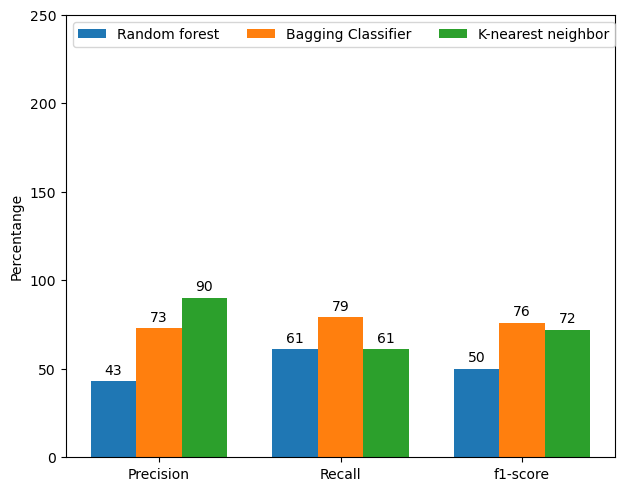

In [212]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Precision", "Recall","f1-score")
penguin_means = {
    'Random forest': (43,61,50),
    'Bagging Classifier': (73,79,76),
    'K-nearest neighbor': (90,61,72)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentange')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

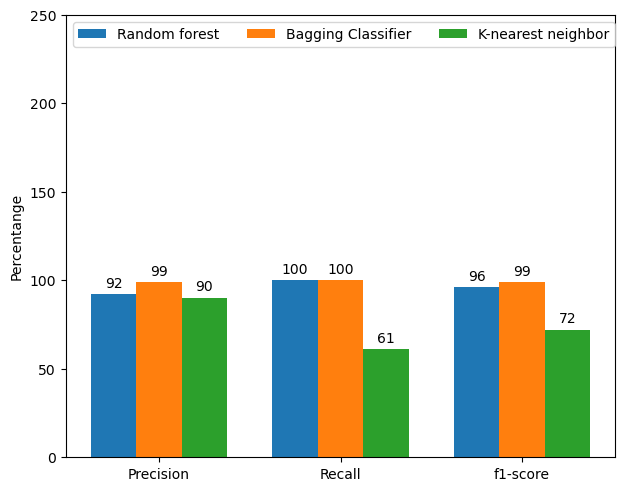

In [213]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Precision", "Recall","f1-score")
penguin_means = {
    'Random forest': (92,100,96),
    'Bagging Classifier': (99,100,99),
    'K-nearest neighbor': (90,61,72)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentange')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [214]:
bg_clf = BaggingClassifier(random_state=1)

In [215]:
parameters = {
    'n_estimators': [10,20,30,40,100,300,400],
    'max_features': [0.90, 0.92, 0.95, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}
clf = GridSearchCV(bg_clf, parameters, verbose = 1, cv=5, n_jobs = -1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.9, 0.92, 0.95, 1.0],
                         'n_estimators': [10, 20, 30, 40, 100, 300, 400]},
             verbose=1)

In [222]:
clf.best_score_

0.92718407960199

In [227]:
print("Best parameters found after hyperparameter tunning are for ensemble bagged tree")
clf.best_params_

Best parameters found after hyperparameter tunning are for ensemble bagged tree


{'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 0.95,
 'n_estimators': 300}

In [38]:
bag_tuned = BaggingClassifier(n_estimators=300,bootstrap=True,bootstrap_features=True,max_features=0.95,random_state=0)
bag_tuned.fit(X_train,y_train)
pred_bag_tuned_test=bag_tuned.predict(X_test)
print(classification_report(y_test,pred_bag_tuned_test))
pred_bag_test=bag_tuned.predict(X_test)

                   precision    recall  f1-score   support

  Collision_Link5       0.71      0.87      0.78        46
  Collision_Link6       0.89      0.83      0.86        47
Intentional_Link5       0.89      0.74      0.81        87
Intentional_Link6       0.85      0.94      0.89        71
       Noncontact       1.00      1.00      1.00       290

         accuracy                           0.92       541
        macro avg       0.87      0.88      0.87       541
     weighted avg       0.93      0.92      0.92       541



In [39]:
acc_bg_tuned=accuracy_score(y_test,pred_bag_tuned_test)
print("Accuracy of ensemble bagging tree model in test dataset is " +str(round(acc_bg_tuned*100,2))+"%")

Accuracy of ensemble bagging tree model in test dataset is 92.42%
